Dataset
In this homework, we will use the California Housing Prices from Kaggle.

Here's a wget-able link:


In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv


--2023-09-22 20:13:14--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: 'housing.csv.2'

     0K .......... .......... .......... .......... ..........  3% 1.79M 1s
    50K .......... .......... .......... .......... ..........  7% 3.08M 1s
   100K .......... .......... .......... .......... .......... 10% 3.08M 0s
   150K .......... .......... .......... .......... .......... 14% 4.42M 0s
   200K .......... .......... .......... .......... .......... 17% 3.70M 0s
   250K .......... .......... .......... .......... .......... 21% 2.98M 0s
   300K .......... .......... .......... .......... .......... 25% 5.92M 0s
   350K .......... .......... 

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').


### EDA

- Load the data.
- Look at the median_house_value variable. Does it have a long tail?


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df["median_house_value"]

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

c:\Users\david\Desktop\Zoomcamps\machine-learning-zoomcamp_homeworks\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\david\Desktop\Zoomcamps\machine-learning-zoomcamp_homeworks\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

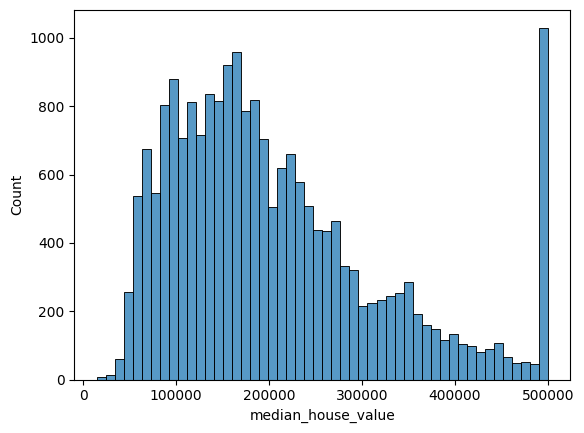

In [6]:
sns.histplot(df.median_house_value, bins=50)

In [7]:
close_to_ocean_hose_df = df[df["ocean_proximity"].isin(
    ["INLAND", "<1H OCEAN"])]
close_to_ocean_hose_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Preparing the dataset
For this homework, we only want to use a subset of data.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Next, use only the following columns:


In [8]:
col_select = [
    "latitude",
    "longitude",
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
    "median_house_value",
]

In [9]:
close_to_ocean_hose_df = close_to_ocean_hose_df.filter(col_select)


close_to_ocean_hose_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


## Question 1

There's one feature with missing values. What is it?<br>

Answer: total_bedrooms


In [10]:
close_to_ocean_hose_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Question 2

What's the median (50% percentile) for variable 'population'?
<br>

Answer: 1195


In [11]:
int(close_to_ocean_hose_df["population"].median())

1195

### Prepare and split the dataset

- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.


In [12]:
n = len(close_to_ocean_hose_df)


n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [13]:
n, n_val + n_test + n_train

(15687, 15687)

In [14]:
n_val, n_test, n_train

(3137, 3137, 9413)

In [15]:
close_to_ocean_hose_df.reset_index(drop=True, inplace=True)

In [16]:
close_to_ocean_hose_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
15682,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
15683,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
15684,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
15685,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [17]:
# get the last four
close_to_ocean_hose_df.iloc[15682:]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15682,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
15683,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
15684,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
15685,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0
15686,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0


In [18]:
df_train = close_to_ocean_hose_df.iloc[n_train:]
df_val = close_to_ocean_hose_df.iloc[n_train : n_train + n_val]
df_test = close_to_ocean_hose_df.iloc[n_train + n_val :]

In [19]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [20]:
close_to_ocean_hose_df.iloc[idx[:10]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15183,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
4469,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
9316,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
4983,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
13154,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0
10838,-121.24,38.64,13.0,4491.0,689.0,1657.0,667.0,5.2590,249400.0
3013,-118.23,34.09,47.0,859.0,239.0,913.0,234.0,2.6442,136100.0
10957,-121.32,38.59,24.0,4378.0,910.0,2149.0,812.0,2.5035,123700.0
9767,-121.23,40.01,38.0,725.0,190.0,219.0,115.0,1.6250,75000.0
11469,-117.28,34.15,36.0,1734.0,280.0,604.0,259.0,3.8292,122200.0


In [21]:
df_train = close_to_ocean_hose_df.iloc[idx[:n_train]]
df_val = close_to_ocean_hose_df.iloc[idx[n_train: n_train + n_val]]
df_test = close_to_ocean_hose_df.iloc[idx[n_train + n_val:]]

In [22]:
df_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9866,-117.44,33.90,23.0,4487.0,754.0,2609.0,778.0,4.2788,148700.0
365,-121.65,38.03,28.0,3144.0,694.0,1095.0,482.0,3.4402,192400.0
13902,-121.85,37.25,20.0,3773.0,624.0,1965.0,607.0,5.4939,241200.0
12089,-116.97,32.78,35.0,1113.0,236.0,681.0,246.0,2.9784,136400.0
12519,-121.32,37.97,43.0,2453.0,490.0,1093.0,438.0,2.9107,88800.0
...,...,...,...,...,...,...,...,...,...
5191,-118.14,34.15,41.0,1256.0,407.0,855.0,383.0,1.9923,500001.0
13418,-121.86,37.40,19.0,4043.0,764.0,2196.0,708.0,6.1504,268400.0
5390,-118.15,34.07,52.0,1983.0,344.0,887.0,331.0,3.2875,234400.0
860,-119.81,36.78,37.0,1965.0,364.0,796.0,335.0,3.6250,83400.0


In [23]:
# 60%            20%            20%
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [24]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
y_train = np.log1p(df_train["median_house_value"].values)
y_val = np.log1p(df_val["median_house_value"].values)
y_test = np.log1p(df_test["median_house_value"].values)

In [26]:
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

In [27]:
# check if both dataset has the same no. of values
a = list[len(y_train), len(y_val), len(y_test)]
b = list[len(df_train), len(df_val), len(df_test)]
a == b

True

In [28]:
price_logs = np.log1p(close_to_ocean_hose_df["median_house_value"])
price_logs

0        12.973866
1        12.287657
2        12.419574
3        12.554971
4        12.287196
           ...    
15682    11.265758
15683    11.252872
15684    11.432810
15685    11.346883
15686    11.400887
Name: median_house_value, Length: 15687, dtype: float64

## Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using `round(score, 2)`
- Which option gives better RMSE?


### Answer: Both are equally good


### Filling with 0s approach


In [29]:
df_train.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        94
population             0
households             0
median_income          0
dtype: int64

In [30]:
df_train["total_bedrooms"] = df_train["total_bedrooms"].fillna(0)
df_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [31]:
# X_train
dict(df_train.dtypes)

{'longitude': dtype('float64'),
 'latitude': dtype('float64'),
 'housing_median_age': dtype('float64'),
 'total_rooms': dtype('float64'),
 'total_bedrooms': dtype('float64'),
 'population': dtype('float64'),
 'households': dtype('float64'),
 'median_income': dtype('float64')}

In [32]:
X_train = df_train.values
X_train

array([[-1.1914e+02,  3.6230e+01,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [-1.1779e+02,  3.4120e+01,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [-1.1797e+02,  3.3680e+01,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [-1.1808e+02,  3.4130e+01,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [-1.1846e+02,  3.4290e+01,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [-1.1841e+02,  3.4000e+01,  1.8000e+01, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

In [33]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])

    X = np.column_stack([ones, X])
    XTX = (X.T) @ X
    XTX_inv = np.linalg.inv(XTX)

    w_full = (XTX_inv @ X.T) @ y

    return w_full[0], w_full[1:]

In [34]:
w0, w = train_linear_regression(X_train, y_train)

In [35]:
y_pred = w0 + (X_train @ w)

c:\Users\david\Desktop\Zoomcamps\machine-learning-zoomcamp_homeworks\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\david\Desktop\Zoomcamps\machine-learning-zoomcamp_homeworks\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\david\Desktop\Zoomcamps\machine-learning-zoomcamp_homeworks\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\david\Desktop\Zoomcamps\machine-learning-zoomcamp_homeworks\venv\L

<Axes: ylabel='Count'>

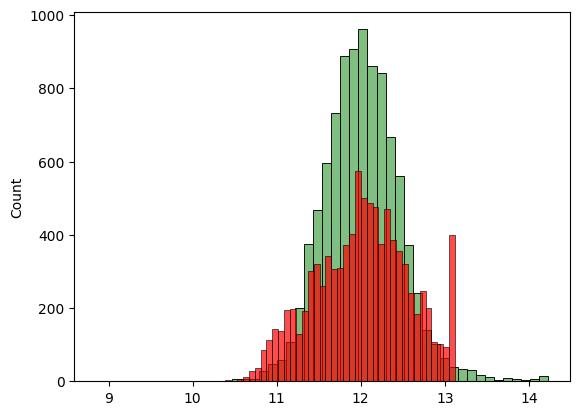

In [36]:
sns.histplot(y_pred, color="green", alpha=0.5, bins=50)
sns.histplot(y_train, color="red", alpha=0.7, bins=50)

In [37]:
def rmse(y, y_pred):
    error = y - y_pred
    sqr_error = error**2
    mean_sqr_error = sqr_error.mean()
    sqrt_meansqr_error = np.sqrt(mean_sqr_error)

    return sqrt_meansqr_error

In [38]:
X_train = df_train.fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + (X_train @ w)

In [39]:
def prepare_X(df):
    df_num = df
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [40]:
# Train
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation
X_val = prepare_X(df_val)
y_pred = w0 + (X_val @ w)

score = rmse(y_val, y_pred)
round(score, 2)

0.34

### Filling with mean approach


In [41]:
df_train["total_bedrooms"] = df_train["total_bedrooms"].fillna(
    df_train["total_bedrooms"].mean()
)

In [42]:
X_train = df_train.values
X_train

array([[-1.1914e+02,  3.6230e+01,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [-1.1779e+02,  3.4120e+01,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [-1.1797e+02,  3.3680e+01,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [-1.1808e+02,  3.4130e+01,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [-1.1846e+02,  3.4290e+01,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [-1.1841e+02,  3.4000e+01,  1.8000e+01, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

In [43]:
w0, w = train_linear_regression(X_train, y_train)

In [44]:
y_pred = w0 + (X_train @ w)

In [45]:
# Train
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation
X_val = prepare_X(df_val)
y_pred = w0 + (X_val @ w)

score = rmse(y_val, y_pred)
round(score, 2)

0.34

### Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

### Answer: 0


In [46]:
def train_linear_regression_regu(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = (X.T) @ X
    XTX = XTX + (r * np.eye(XTX.shape[0]))

    XTX_inv = np.linalg.inv(XTX)
    w_full = (XTX_inv @ X.T) @ y

    return w_full[0], w_full[1:]

In [47]:
df_train["total_bedrooms"] = df_train["total_bedrooms"].fillna(0)

In [48]:
# Train
X_train = prepare_X(df_train)
w0, w = train_linear_regression_regu(X_train, y_train, r=0)

# Validation
X_val = prepare_X(df_val)
y_pred = w0 + (X_val @ w)

rmse(y_val, y_pred)

0.3408479034173412

In [49]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    # Train
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_regu(X_train, y_train, r=r)

    # Validation
    X_val = prepare_X(df_val)
    y_pred = w0 + (X_val @ w)

    score = rmse(y_val, y_pred)

    print(f"{score.min()}")

    print(
        f"Regularization Parameter:{r}\n Bias term: {w0}\n Score: {score}\n\n")

0.3408479034173412
Regularization Parameter:0
 Bias term: -9.763249478233348
 Score: 0.3408479034173412


0.3408479061774746
Regularization Parameter:1e-06
 Bias term: -9.763228831250228
 Score: 0.3408479061774746


0.3408481800503526
Regularization Parameter:0.0001
 Bias term: -9.76118523564182
 Score: 0.3408481800503526


0.3408506921870557
Regularization Parameter:0.001
 Bias term: -9.742646249775225
 Score: 0.3408506921870557


0.340877930050093
Regularization Parameter:0.01
 Bias term: -9.561056193061212
 Score: 0.340877930050093


0.34128620419927114
Regularization Parameter:0.1
 Bias term: -8.058889769717469
 Score: 0.34128620419927114


0.34489583276453517
Regularization Parameter:1
 Bias term: -3.1331542785801956
 Score: 0.34489583276453517


0.34773980704777097
Regularization Parameter:5
 Bias term: -0.8410867975088877
 Score: 0.34773980704777097


0.34831498335189265
Regularization Parameter:10
 Bias term: -0.4381172315737143
 Score: 0.34831498335189265




### Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
- Round the result to 3 decimal digits (`round(std, 3)`)


In [50]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [51]:
pd.options.mode.chained_assignment = None

In [52]:
rmse_list = []

for seed in seeds:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_shuffled = close_to_ocean_hose_df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train : n_train + n_val].copy()
    df_test = df_shuffled.iloc[n_train + n_val :].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train["median_house_value"].values
    y_val = df_val["median_house_value"].values
    y_test = df_test["median_house_value"].values

    y_train = np.log1p(y_train)
    y_val = np.log1p(y_val)
    y_test = np.log1p(y_test)

    del df_train["median_house_value"]
    del df_val["median_house_value"]
    del df_test["median_house_value"]

    # Validation
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + (X_val @ w)

    rmse_val = np.round((rmse(y_val, y_pred)), 2)

    rmse_list.append(rmse_val)

    std = round(np.std(rmse_list), 3)

    print(f"Seed: {seed}, w0: {w0}, rmse: {rmse_val}\n")

    print(f"Standard deviation: {std}")

Seed: 0, w0: -9.870068970758581, rmse: 0.34

Standard deviation: 0.0
Seed: 1, w0: -9.114011209778669, rmse: 0.34

Standard deviation: 0.0
Seed: 2, w0: -9.9115602006467, rmse: 0.34

Standard deviation: 0.0
Seed: 3, w0: -10.233183681368352, rmse: 0.33

Standard deviation: 0.004
Seed: 4, w0: -9.174763450685843, rmse: 0.34

Standard deviation: 0.004
Seed: 5, w0: -10.006648303737308, rmse: 0.34

Standard deviation: 0.004
Seed: 6, w0: -10.039903099850587, rmse: 0.34

Standard deviation: 0.003
Seed: 7, w0: -10.353545445248718, rmse: 0.35

Standard deviation: 0.005
Seed: 8, w0: -9.899416167128996, rmse: 0.35

Standard deviation: 0.006
Seed: 9, w0: -9.964622125927585, rmse: 0.33

Standard deviation: 0.006


In [53]:
rmse_list

[0.34, 0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.35, 0.33]

In [54]:
round(np.std(rmse_list), 3)

0.006

### Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with `r=0.001`.
- What's the RMSE on the test dataset?


In [55]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_shuffled = close_to_ocean_hose_df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train : n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val :].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train["median_house_value"].values
y_val = df_val["median_house_value"].values
y_test = df_test["median_house_value"].values

y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

# Validation
X_train = prepare_X(df_train)
w0, w = train_linear_regression_regu(X_train, y_train, r=0.001)

X_val = prepare_X(df_val)
y_pred = w0 + (X_val @ w)

rmse(y_val, y_pred)

0.3341530188103547

In [56]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)